# Logistic Regression

### Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from tabulate import tabulate
import copy, math

In [35]:
exams_data = pd.read_csv("Twoexams_results.csv")
exams_data.head(5)

,exam1,exam2,admitted
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [32]:
x_train = np.array(exams_data.loc[:,'exam1':'exam2'])
y_train = np.array(exams_data['admitted'])
m, n = x_train.shape
m,n

(99, 2)

In [23]:
x_train[:5,:], y_train[:5]

(array([[30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178]]),
 array([0, 0, 1, 1, 0], dtype=int64))

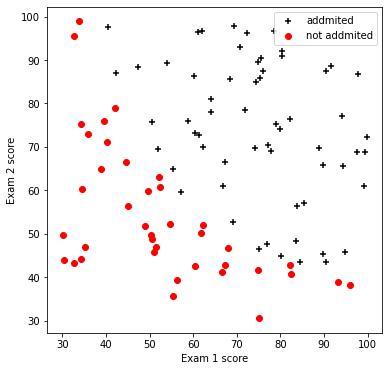

In [29]:
pos = y_train == 1
neg = y_train == 0
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(x_train[pos, 0], x_train[pos, 1], marker='+', c='black', label='addmited')
ax.scatter(x_train[neg, 0], x_train[neg, 1], marker='o', c='r', label='not addmited')
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

### Sigmoid Function <br>
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )  $$ 


In [37]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

In [38]:
print(f"sigmod(0) = {sigmoid_function(0)}")

sigmod(0) = 0.5


### Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [43]:
def compute_logistic_cost(x, y, w, b):
    cost = 0.0
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        f_wb = sigmoid_function(z_i)
        cost += (-y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb))
    
    cost = cost / m
    return cost

In [45]:
w_in = np.zeros(n)
b_in = 0

compute_logistic_cost(x_train, y_train, w_in, b_in)

0.6931471805599458

### Logistic Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


In [47]:
def compute_gradient(x, y, w, b):
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        z_i = np.dot(w, x[i]) + b
        f_wb = sigmoid_function(z_i)
        err = f_wb - y[i]
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        
        dj_db += err
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_dw, dj_db

In [48]:
dj_dw, dj_db = compute_gradient(x_train, y_train, w_in, b_in)
print(f"dj_dw: {dj_dw}" )
print(f"dj_db: {dj_db}" )

dj_dw: [-12.30538878 -11.77067239]
dj_db: -0.10606060606060606


###  Learning parameters using gradient descent

In [68]:
def gradient_descent(x, y, alpha, iteration_num, initil_w, initil_b, compute_gradient):
    
    w = copy.deepcopy(w_in) 
    b = initil_b 
    j_history= []
    data = []

    for i in range(iteration_num):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
         # View test points
        j_history.append(compute_logistic_cost(x, y, w, b))

        if i % 1000 == 0:
             ## Initialize the data
            row = [i, j_history[i], dj_dw[0], dj_dw[1],dj_db, w[0], w[1], b]
            data.append(row)

    # Define the table headers
    headers = ["iterations", "Cost", "dj_dw_0", "dj_dw_1","dj_db","w0","w1", "b"]

    # Print the table
    print(tabulate(data, headers=headers,colalign='right'))
    return w , b

In [69]:
iterations = 10001
alpha = 0.001
w_in = 0.01 * (np.random.rand(2) - 0.5) # from lab
b_in = -8
finish_w, finish_b = gradient_descent(x_train, y_train, alpha,iterations, w_in, b_in, compute_gradient)
finish_w , finish_b

  iterations      Cost       dj_dw_0       dj_dw_1      dj_db         w0         w1         b
------------  --------  ------------  ------------  ---------  ---------  ---------  --------
0             0.938976  -45.2592      -44.7978      -0.605689  0.0492153  0.0423297  -7.99939
1000          0.303792  -0.000148824  -0.000149664  0.0189935  0.0689198  0.0648192  -8.01814
2000          0.303432  -0.000148352  -0.00014918   0.018931   0.0690684  0.0649686  -8.03711
3000          0.303075  -0.000147884  -0.000148699  0.0188689  0.0692165  0.0651176  -8.05601
4000          0.30272   -0.000147418  -0.000148222  0.0188072  0.0693642  0.065266   -8.07484
5000          0.302367  -0.000146955  -0.000147747  0.018746   0.0695113  0.065414   -8.09362
6000          0.302017  -0.000146495  -0.000147276  0.0186851  0.0696581  0.0655615  -8.11234
7000          0.301669  -0.000146038  -0.000146807  0.0186246  0.0698043  0.0657086  -8.13099
8000          0.301323  -0.000145584  -0.000146342  0.018564

(array([0.07024042, 0.06614691]), -8.186594313949268)

In [70]:
finish_w[1]

0.06614691347339081

## Decision Boundary

 at z = 0
 z = w0.x0 + w1.x1 + b 
 0.07024042.x0 + 0.06614691.x1 - 8.186594313949268 = 0
 x1 = (-b - w0.x0) / w1

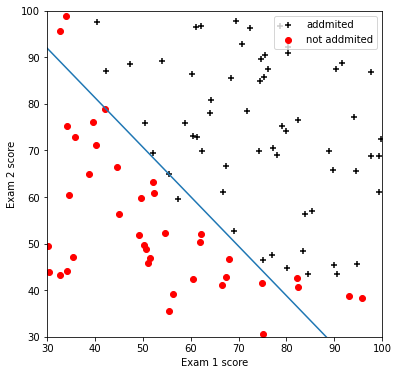

In [76]:
pos = y_train == 1
neg = y_train == 0
x_0 = np.arange(m)
x_1 = (-finish_b - finish_w[0]* x_0) / finish_w[1]
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(x_train[pos, 0], x_train[pos, 1], marker='+', c='black', label='addmited')
ax.scatter(x_train[neg, 0], x_train[neg, 1], marker='o', c='r', label='not addmited')
ax.plot(x_0, x_1)
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
ax.set_xlim([30, 100])
ax.set_ylim([30, 100])
plt.show()

### Evaluating logistic regression

 complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.

In [85]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(x, w, b): 
    m, n = x.shape
    p = np.zeros(m)
   
    for i in range(m):  
        
        z_wb = np.dot(w, x[i]) + b
        # Calculate the prediction for this example
        f_wb = sigmoid_function(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb >= .5 else 0 
        
    ### END CODE HERE ### 
    return p

In [86]:
x_test = x_train[:5, :]
x_test , y_train[:5]

(array([[30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178]]),
 array([0, 0, 1, 1, 0], dtype=int64))

In [87]:
estimated_values = predict(x_test, finish_w, finish_b) 
estimated_values

array([0., 0., 1., 1., 0.])

In [88]:
estimated_values = predict(x_train, finish_w, finish_b) 
estimated_values

array([0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

In [95]:
true_sum = (estimated_values == y_train).sum()

### Accuracy

In [100]:
print(f'Train Accuracy:{(true_sum / y_train.size ) * 100:.0f} %')

Train Accuracy:92 %


In [106]:
test = np.array([[65, 58]])
predict(test ,finish_w, finish_b)

array([1.])

In [111]:
test_array_2d = np.random.randint(low=30, high=101, size=(10, 2))
print(test_array_2d)
predict(test_array_2d ,finish_w, finish_b) 

[[ 98  51]
 [ 45  69]
 [ 36  54]
 [ 47  45]
 [ 66  64]
 [100  87]
 [ 38  63]
 [ 98  85]
 [ 43  64]
 [ 34  44]]


array([1., 0., 0., 0., 1., 1., 0., 1., 0., 0.])